## Stage 1: Initial Data Exploration & Traditional Validation

### Objective:
To perform traditional data exploration and validation techniques on the Diabetes 130-US hospitals dataset. This includes checking the structure, missing values, unique entries, and summary statistics to identify any surface-level issues before modeling or applying XAI.


#### Loading the dataset and begins the exploration

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/diabetic_data.csv')

# Preview top rows
display(df.head())


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
# Summary statistics (numeric only)
display(df.describe())

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:

# Check missing values (including placeholders like '?')
missing_placeholder_counts = (df == '?').sum()
print("Placeholders ('?') per column:\n", missing_placeholder_counts[missing_placeholder_counts > 0])


Placeholders ('?') per column:
 race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64


In [8]:
# Number of unique values per column
unique_counts = df.nunique()
print("\nUnique values per column:\n", unique_counts)


Unique values per column:
 encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide             

#### Readmission Value Counts

In [11]:
# Distribution of readmission categories
print("🔍 Readmission Value Counts:")
print(df['readmitted'].value_counts())


🔍 Readmission Value Counts:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


#### Race Distribution

In [12]:
# Check race balance
print("\n🔍 Race Distribution:")
print(df['race'].value_counts())



🔍 Race Distribution:
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


#### Gender Distribution

In [13]:
# Check gender balance
print("\n🔍 Gender Distribution:")
print(df['gender'].value_counts())



🔍 Gender Distribution:
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64


####  Duplicate Patient Records

In [14]:
# How many patient IDs are repeated?
duplicate_patients = df['patient_nbr'].duplicated().sum()
total_patients = df['patient_nbr'].nunique()
print(f"\n🔁 Duplicate Patient Records: {duplicate_patients}")
print(f"🧑‍⚕️ Unique Patients: {total_patients}")
print(f"📄 Total Records: {len(df)}")



🔁 Duplicate Patient Records: 30248
🧑‍⚕️ Unique Patients: 71518
📄 Total Records: 101766


#### Age Group Distribution

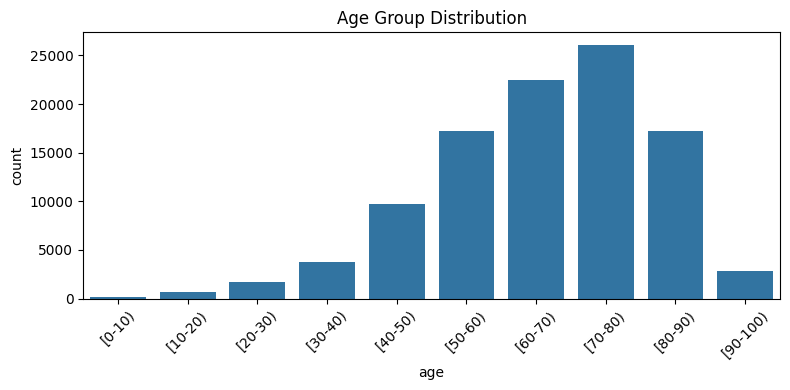

🔢 Age Group Frequency Table:
age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: count, dtype: int64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age group plot
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='age', order=sorted(df['age'].unique()))
plt.title("Age Group Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Age group value counts
print("🔢 Age Group Frequency Table:")
print(df['age'].value_counts().sort_index())


#### Binary Readmission Balance Preview

In [16]:
# Recode to binary (for classification)
readmit_map = df['readmitted'].replace({'>30': 'YES', '<30': 'YES', 'NO': 'NO'})
print("\n🔍 Binary Readmission (YES/NO) Balance:")
print(readmit_map.value_counts())



🔍 Binary Readmission (YES/NO) Balance:
readmitted
NO     54864
YES    46902
Name: count, dtype: int64


### Summary of Findings:

1. **Dataset Shape & Types:**
   - The dataset contains 101,766 patient encounter records and 50 columns.
   - Out of these, 37 columns are categorical (`object` type), while 13 are numerical (`int64`), reflecting a rich mix of qualitative and quantitative features.
   - Several columns are encoded as numeric IDs (e.g., `admission_type_id`, `discharge_disposition_id`, `admission_source_id`), which will require mapping for interpretability.

2. **Missing or Placeholder Values:**
   - Traditional missing values like `NaN` are rare, but **many columns use `'?'` as a placeholder** to denote missing or unknown values.
     - `weight`: ~97% missing
     - `medical_specialty`: ~49%
     - `payer_code`: ~40%
     - `race`: ~2%
     - Diagnostic fields (`diag_1`, `diag_2`, `diag_3`) also contain `'?'`, but less frequently.
   - These placeholders will need to be handled through removal, imputation, or special encoding.

3. **Uniqueness & Identity Columns:**
   - `encounter_id` is a unique identifier for each hospital visit and should not be used as a feature.
   - `patient_nbr` identifies individual patients. Analysis reveals:
     - There are 71,518 unique patients.
     - Over 30,000 encounters are repeated records from the same patient.
     - This confirms **longitudinal data**, where some patients have multiple visits — important for detecting **readmission** patterns and ensuring proper train-test splits (no leakage).

4. **Categorical Feature Distributions:**
   - `age` is already binned into 10-year ranges (e.g., `[0-10)`, `[10-20)`, ..., `[90-100)`), with the majority of patients in the **[60-70)** and **[70-80)** bins.
   - `race` distribution is skewed:
     - Majority are **Caucasian**, followed by **AfricanAmerican** and **Hispanic**.
     - A small percentage is missing (`?`), which may hold significance in bias analysis.
   - `gender` has three unique values, but one appears to be invalid or ambiguous — likely needs filtering.
   - `readmitted` has 3 classes:
     - `'NO'`: No readmission
     - `'>30'`: Readmitted after 30 days
     - `'<30'`: Readmitted within 30 days (**target class**)
   - For binary classification, we will consolidate this into:
     - `'YES'` for `'<30'` and `'>30'`
     - `'NO'` for `'NO'`

5. **Class Imbalance:**
   - The dataset is **highly imbalanced**, with the majority of samples in the `'NO'` class.
   - This imbalance will affect model performance and must be addressed (e.g., with stratified sampling or reweighting).

6. **Initial Insight on Data Quality and Bias Potential:**
   - The dataset reflects real-world healthcare complexities: missing information, repeated entries, encoded IDs, and socioeconomic attributes (race, gender, payer).
   - While traditional validation reveals missing data and class imbalance, it **does not detect hidden biases**, data quality inconsistencies, or **potentially discriminatory patterns**.
   - This limitation **motivates the use of XAI** methods like SHAP and LIME to identify deeper model-data interactions that surface trust and fairness issues.
